<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Hola mundo!
#### Autor: *Victor Rodolfo Gerez*


Cargo librerías:

In [30]:
# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import matplotlib as mpl

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

Configuro gráficos:

In [31]:
plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

Ejemplo con $\omega_0=1 \,$ y $\, Q=\frac {\sqrt 2}{2}$

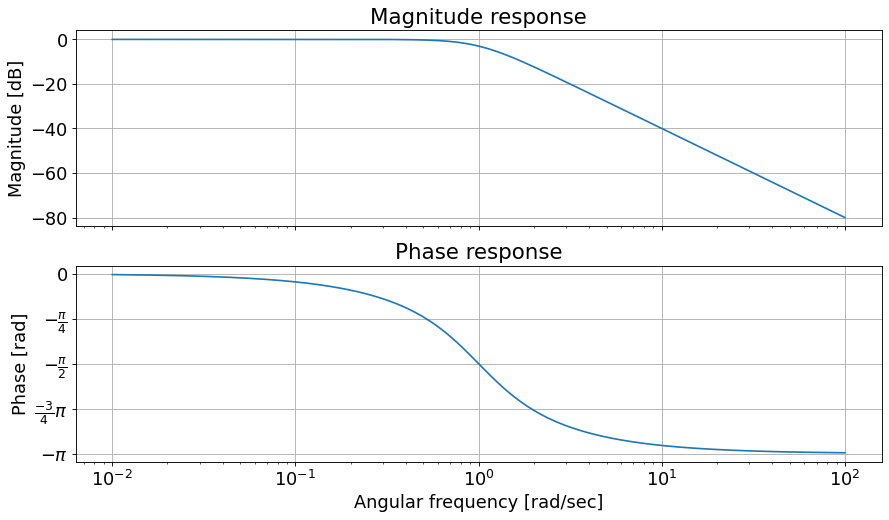

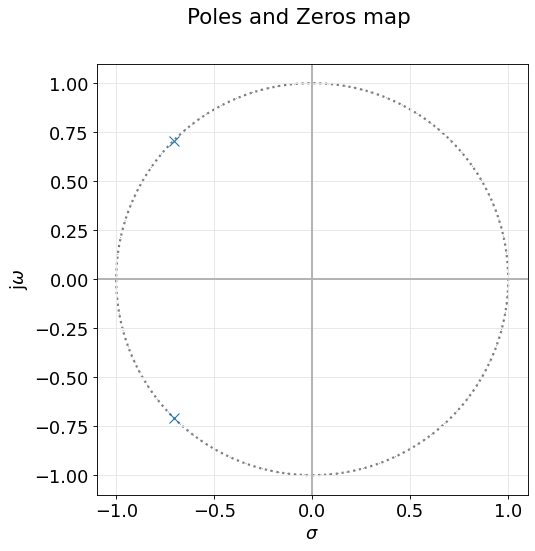

In [32]:
     
# Definimos los parámetros de la simulación

# Probar diferentes valores de Q
#################################

#Q = 1/3           # sobreamortiguado
#Q = 1/2  # amortiguamiento crítico  (son definiciones de T. de control)
Q = np.sqrt(2)/2             # subamortiguado

# Luego de analizar diferentes Q, probar desnormalizar
######################################################
w0 = 1

# Cargamos la funcion transferencia como vectores de sus coeficientes.

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

_, axes_hdl = bodePlot(H1)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
plt.sca(axes_hdl[0])
#plt.ylim([-1,1])

plt.gca

pzmap(H1)

plt.show()


Ejemplo con $\omega_0=1 \,$ y variando el $Q$:

$Q_1=15$  
$Q_2=0,5$  
$Q_3=0,2$  

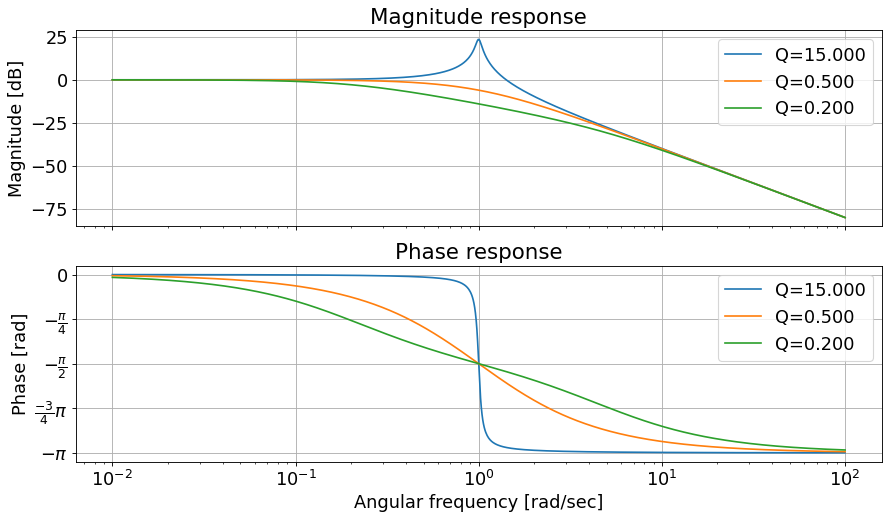

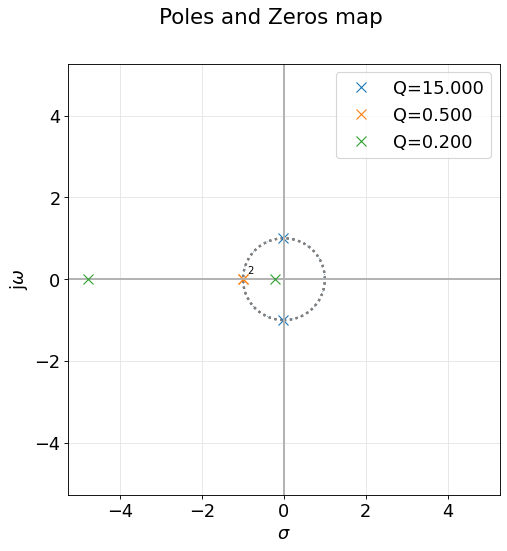

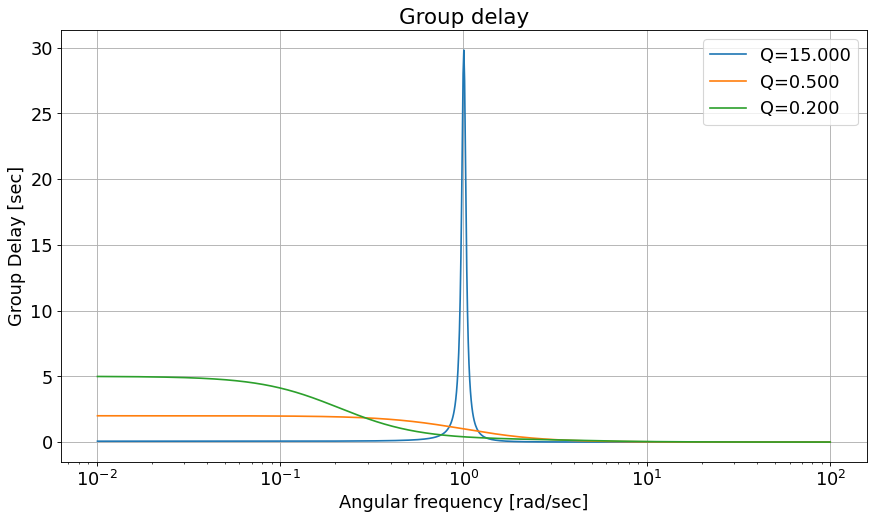

In [33]:
qq_param = [ 15, 0.5, 0.2]

for qq in range(len(qq_param)):
    
    my_tf = TransferFunction( [w0**2], [1, w0/qq_param[qq], w0**2] )
    
    bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq_param[qq]) )
    
    pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq_param[qq])) #S plane pole/zero plot
    
    GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq_param[qq]))

## Conclusiones

Se observan 3 casos diferentes al variar el $Q$:

$Q_1=15$ (subamortiguado) $\Rightarrow$ polos complejos conjugados   
$Q_2=0,5$ (amortiguamiento crítico) $\Rightarrow$ polos reales iguales  
$Q_3=0,1$ (sobreamortiguado) $\Rightarrow$ polos reales distintos